

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [7]:
import pandas as pd

In [34]:
df = pd.read_csv("D:/Data_Science/7-Machine_Learning/projects/British_Airways_realData/customer_booking.csv", encoding="ISO-8859-1")

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [10]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [11]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [12]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
df['sales_channel'] = encoder.fit_transform(df[['sales_channel']])
df['trip_type'] = encoder.fit_transform(df[['trip_type']])
df['route'] = encoder.fit_transform(df[['route']])
df['booking_origin'] = encoder.fit_transform(df[['booking_origin']])



In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [15]:
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0.400684,1.0,0.0,1.957530,-0.119353,-0.381764,6,1.0,0.0,1,0,0,-1.174175,0
1,-0.579559,1.0,0.0,0.299164,-0.089844,-1.120780,6,1.0,0.0,0,0,0,-1.174175,0
2,0.400684,1.0,0.0,1.747470,-0.030824,1.465775,3,1.0,0.0,1,1,0,-1.174175,0


In [16]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [17]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000
mean,0.000020,0.989940,0.002320,0.000020,0.000120,0.357440,3.814420,0.001680,0.007740,0.668780,0.296960,0.427140,1.023182e-16,0.149560
std,0.004472,0.099795,0.048111,0.004472,0.010954,0.479251,1.992792,0.040954,0.087637,0.470657,0.456923,0.494668,1.000010e+00,0.356643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.742035e+00,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.107368e+00,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.953700e-01,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.037139e+00,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.484746e+00,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

# Visulazation & Insights

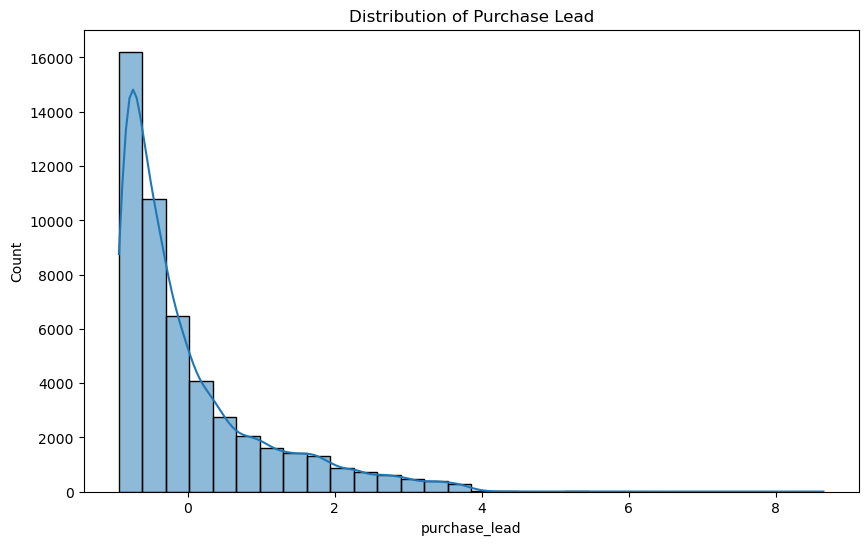

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['purchase_lead'], bins=30, kde=True)
plt.title("Distribution of Purchase Lead")
plt.show()
plt.show()


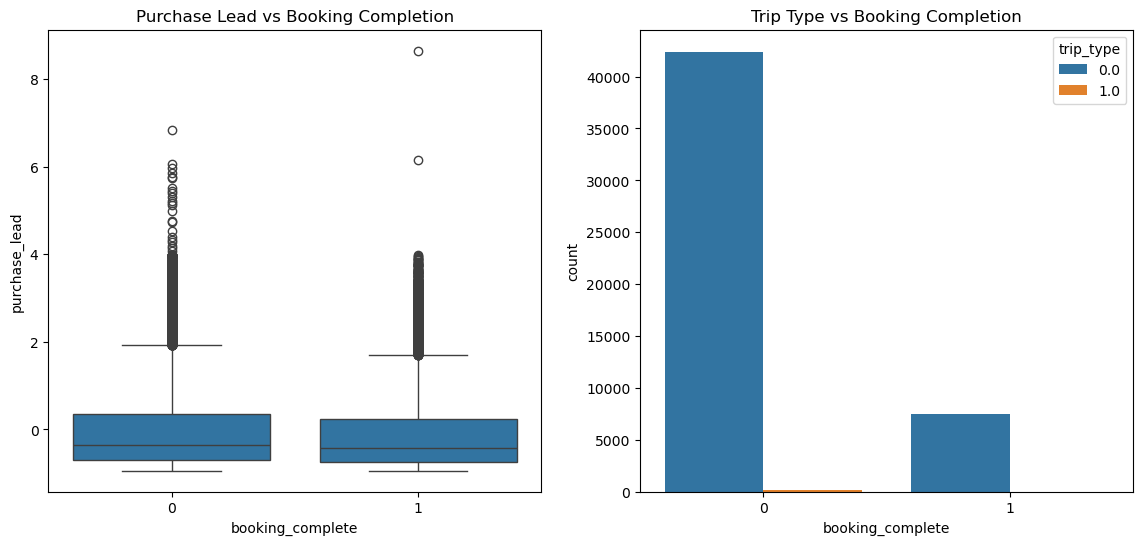

In [19]:
# Visualizing the relationship between booking completion and purchase lead

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.boxplot(x='booking_complete', y='purchase_lead', data=df)
plt.title("Purchase Lead vs Booking Completion")
plt.subplot(1, 2, 2)
sns.countplot(x='booking_complete', hue='trip_type', data=df)
plt.title("Trip Type vs Booking Completion")
plt.show()

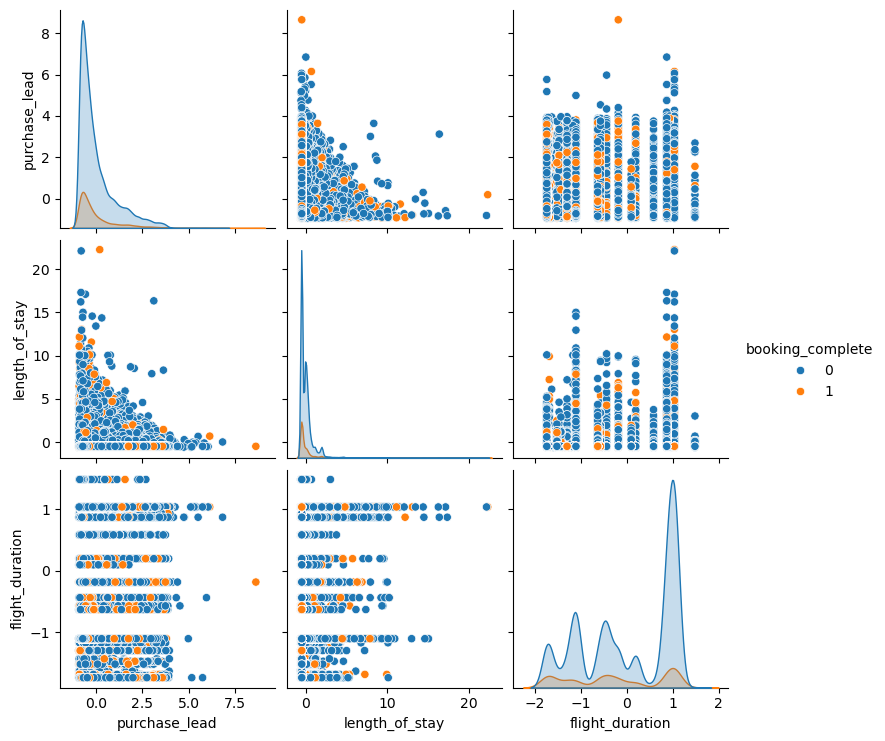

In [20]:
# Visualizing the relationship between booking completion and other features

sns.pairplot(df[['purchase_lead', 'length_of_stay', 'flight_duration', 'booking_complete']], hue='booking_complete')
plt.show()


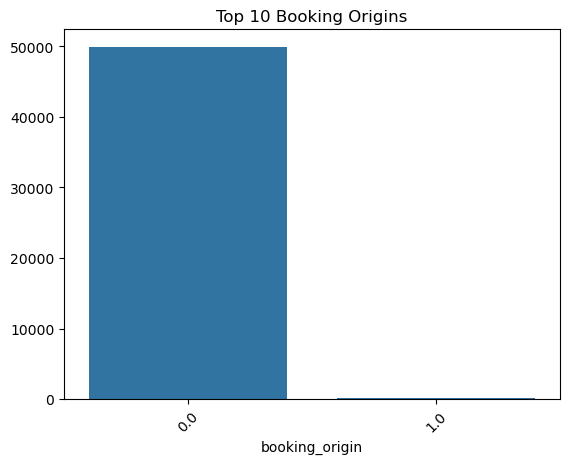

In [21]:
top_origins = df['booking_origin'].value_counts().head(10)
sns.barplot(x=top_origins.index, y=top_origins.values)
plt.title("Top 10 Booking Origins")
plt.xticks(rotation=45)
plt.show()

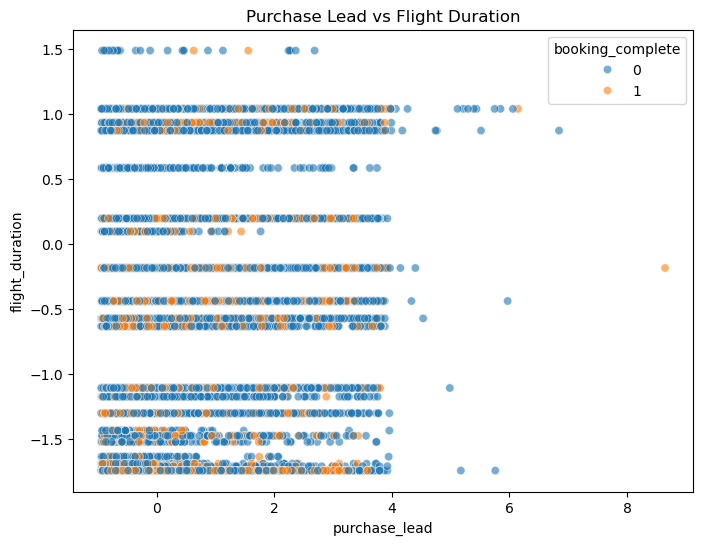

In [22]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='purchase_lead', y='flight_duration', hue='booking_complete', data=df, alpha=0.6)
plt.title("Purchase Lead vs Flight Duration")
plt.show()


In [23]:
x= df.drop(columns=['booking_complete'],axis=1)
y = df['booking_complete']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

In [25]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


models={
    "Random Forest": RandomForestClassifier(class_weight='balanced',n_estimators=80, random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced',random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced',max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=80, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

In [26]:
from sklearn.metrics import accuracy_score, classification_report,recall_score, precision_score, f1_score

df_result={}
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train= model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print(f"Model: {name}")
    print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Classification Report train:\n", classification_report(y_train, y_pred_train))
    print("classification Report test:\n", classification_report(y_test, y_pred_test))
    print("Recall Score train:", recall_score(y_train, y_pred_train))
    print("Recall Score test:", recall_score(y_test, y_pred_test))
    print("Precision Score train:", precision_score(y_train, y_pred_train))
    print("Precision Score test:", precision_score(y_test, y_pred_test))
    print("F1 Score train:", f1_score(y_train, y_pred_train))
    print("F1 Score test:", f1_score(y_test, y_pred_test))
    print("-" * 50)
    df_result[name] = {
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "Recall Score train": recall_score(y_train, y_pred_train),
        "Recall Score test": recall_score(y_test, y_pred_test),
        "Precision Score train": precision_score(y_train, y_pred_train),
        "Precision Score test": precision_score(y_test, y_pred_test),
        "F1 Score train": f1_score(y_train, y_pred_train),
        "F1 Score test": f1_score(y_test, y_pred_test)
    }

df_result = pd.DataFrame(df_result).T
df_result



Model: Random Forest
Train Accuracy: 0.9994222222222222
Test Accuracy: 0.847
Classification Report train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38270
           1       1.00      1.00      1.00      6730

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000

classification Report test:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      4252
           1       0.39      0.04      0.07       748

    accuracy                           0.85      5000
   macro avg       0.62      0.51      0.49      5000
weighted avg       0.78      0.85      0.79      5000

Recall Score train: 0.9986627043090639
Recall Score test: 0.03877005347593583
Precision Score train: 0.9974769961412883
Precision Score test: 0.38666666666666666
F1 Score train: 0.9980694980694981
F1 Score test

c:\Users\Mohamed Hagag\.conda\envs\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:55:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: XGBoost
Train Accuracy: 0.8646222222222222
Test Accuracy: 0.847
Classification Report train:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93     38270
           1       0.89      0.11      0.19      6730

    accuracy                           0.86     45000
   macro avg       0.88      0.55      0.56     45000
weighted avg       0.87      0.86      0.82     45000

classification Report test:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      4252
           1       0.37      0.03      0.06       748

    accuracy                           0.85      5000
   macro avg       0.61      0.51      0.49      5000
weighted avg       0.78      0.85      0.79      5000

Recall Score train: 0.10817236255572066
Recall Score test: 0.03208556149732621
Precision Score train: 0.8899755501222494
Precision Score test: 0.36923076923076925
F1 Score train: 0.19289878113407524
F1 Score test: 0.

,Model,Train Accuracy,Test Accuracy,Recall Score train,Recall Score test,Precision Score train,Precision Score test,F1 Score train,F1 Score test
Random Forest,Random Forest,0.999422,0.847,0.998663,0.03877,0.997477,0.386667,0.998069,0.070474
Decision Tree,Decision Tree,0.999622,0.7644,1.0,0.219251,0.99748,0.216359,0.998739,0.217795
Logistic Regression,Logistic Regression,0.586244,0.586,0.611293,0.580214,0.204504,0.198174,0.306477,0.295439
Gradient Boosting,Gradient Boosting,0.850622,0.8504,0.002823,0.001337,0.633333,0.5,0.005621,0.002667
XGBoost,XGBoost,0.864622,0.847,0.108172,0.032086,0.889976,0.369231,0.192899,0.059041


In [27]:
best_model_f1 = df_result['F1 Score test'].idxmax()
best_f1_value = df_result['F1 Score test'].max()
print(f"Best Model (F1 test): {best_model_f1} with F1 Score = {best_f1_value:.4f}")

Best Model (F1 test): Logistic Regression with F1 Score = 0.2954


In [28]:
best_model_acc = df_result['Test Accuracy'].idxmax()
best_acc_value = df_result['Test Accuracy'].max()
print(f"Best Model (Accuracy test): {best_model_acc} with Accuracy = {best_acc_value:.4f}")

Best Model (Accuracy test): Gradient Boosting with Accuracy = 0.8504


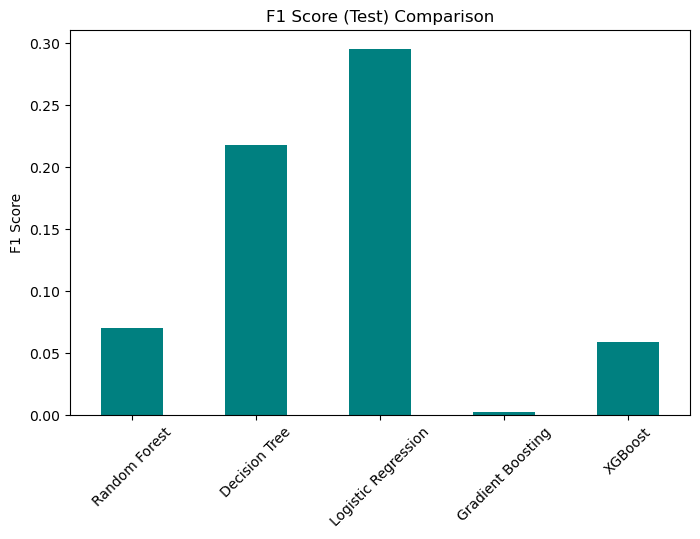

In [29]:
import matplotlib.pyplot as plt

df_result['F1 Score test'].plot(kind='bar', figsize=(8,5), color='teal')
plt.title("F1 Score (Test) Comparison")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.show()

# ✅Logistic Regression Is the Best Model 

In [30]:
model=LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Logistic Regression Model Accuracy: 0.586
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.59      0.71      4252
           1       0.20      0.58      0.30       748

    accuracy                           0.59      5000
   macro avg       0.54      0.58      0.50      5000
weighted avg       0.79      0.59      0.65      5000

Recall Score: 0.5802139037433155
Precision Score: 0.19817351598173516
F1 Score: 0.29543907420013615


# WE Try Together

In [ ]:
import numpy as np
input_data = (
    2,                # num_passengers
    1,                # sales_channel
    0,                # trip_type
    30,               # purchase_lead
    5,                # length_of_stay
    14,               # flight_hour
    3,                # flight_day
    12,               # route (رمز مشفر)
    5,                # booking_origin (رمز مشفر)
    1,                # wants_extra_baggage
    0,                # wants_preferred_seat
    1,                # wants_in_flight_meals
    2.5               # flight_duration
)

input_arr = np.asarray(input_data).reshape(1, -1)

prediction = model.predict(input_arr)

if prediction[0] == 0:
    print('❌ This customer is unlikely to complete the booking.')
else:
    print("🎉 This customer is likely to complete the booking!")


❌ This customer is unlikely to complete the booking.


c:\Users\Mohamed Hagag\.conda\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [35]:
from joblib import dump
dump(model, 'Flight Bookings_Model.joblib')

['Flight Bookings_Model.joblib']